In [18]:
#load tripadvisor_hotel_reviews.csv
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('tripadvisor_hotel_reviews.csv')
df = df.sample(frac=1).reset_index(drop=True) #shuffle the dataset
df.head()

,Review,Rating
0,"wonderful hotel, just returned home 4 nights w...",5
1,nice place wife arrived usa 10am offered choic...,4
2,superb friendly hotel review written tripadvis...,5
3,"great away just got 4 night stay, hotel great ...",2
4,"absolutely terrific, let tell prior leaveing v...",5


,Rating
count,20491.000000
mean,3.952223
std,1.233030
min,1.000000
25%,3.000000
50%,4.000000
75%,5.000000
max,5.000000


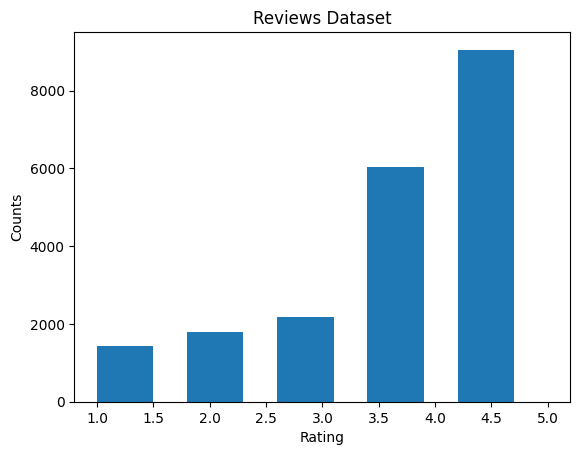

In [14]:
#plot a histogram of the rating column
plt.title("Reviews Dataset")
plt.hist(df['Rating'], bins=5,width=0.5) #bins of [1-1.8, 1.8-2.6, 2.6-3.4, 3.4-4.2, 4.2-5]
plt.xlabel("Rating")
plt.ylabel("Counts")
df.describe()

[1421, 1421, 1421, 1421, 1421]


array([[<Axes: title={'center': 'Rating'}>]], dtype=object)

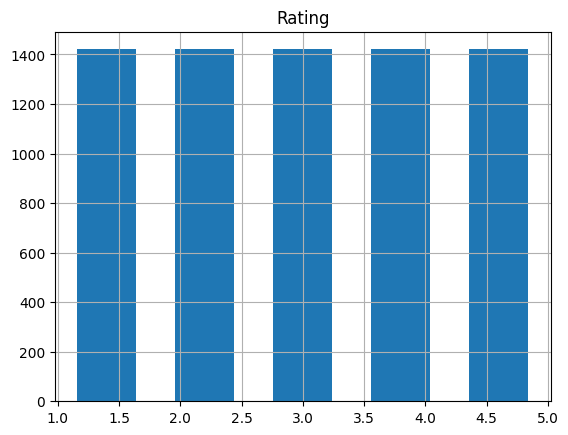

In [47]:

#split data into [1-2,2-3,3-4,4-5] rating groups
ranges=[]
for i in range(1,6):
    ranges.append(df[df['Rating'].between(i,i+1,inclusive="left")]) #e.g. 1's, but not 2's

minSize=min([len(bin) for bin in ranges]) #minimum bin size

#sample each bin to the minimum bin size – eventually will want to choose this based on a skewed gaussian.
for i in range(0,5):
    ranges[i]=ranges[i].sample(minSize) 

print([len(bin) for bin in ranges]) #check that all bins are the same size

#concatenate the bins back together
df=pd.concat(ranges)

#hist of df
df.hist(column='Rating',bins=5, rwidth=0.6)